In [ ]:
import fastdyn_fic_dmf as dmf

def compute_fcd(data, wsize, overlap, isubdiag, params):
    T, N = data.shape
    win_start = np.arange(0, T - params["wsize"] - 1, params["wsize"] - overlap)
    nwins = len(win_start)
    fcd = np.zeros((len(isubdiag[0]), nwins))
    for i in range(nwins):
        tmp = data[win_start[i]:win_start[i] + params["wsize"] + 1, :]
        cormat = np.corrcoef(tmp.T)
        fcd[:, i] = cormat[isubdiag[0], isubdiag[1]]
    return fcd

C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
C = 0.2 * C / np.max(C)
params = dmf.default_params(C=C)
params['N'] = C.shape[0]
isubfcd = np.triu_indices(C.shape[1], 1)
burnout = 7
params["wsize"] = 30
overlap = 29
params['TR'] = 0.72
T = 250
params['dtt'] = 0.001  # Assuming 'dtt' is defined; adjust as needed
nb_steps = int(T * params['TR'] / params['dtt'])
win_start = np.arange(0, T - burnout - params["wsize"], params["wsize"] - overlap)
nwins = len(win_start)
nints = len(isubfcd[0])

emp_data = mat73.loadmat('data/BOLD_timeseries_Awake.mat')
emp_data = np.squeeze(np.array(emp_data['BOLD_timeseries_Awake']))[:,:200,:]
emp_data = emp_data[:,:,burnout:]


emp_fcds = []
for sub in range(emp_data.shape[0]):
    fcds = compute_fcd(emp_data[sub, :, :].T, params["wsize"], overlap, isubfcd, params)
    upp_tr_fcd = np.corrcoef(fcds.T)[np.triu_indices(nwins-1, 1)]
    emp_fcds.append(upp_tr_fcd)

emp_fc = np.mean(np.array([np.corrcoef(emp_data[sub, :, :]) for sub in range(emp_data.shape[0])]), axis=0)
# remove the diagonal
emp_fc = emp_fc - np.eye(emp_fc.shape[0])

emp_fcd = np.hstack((emp_fcds))

In [ ]:
# load ~/Desktop/DatosParaRuben/FittedSimulations/fcs_grid.npy

fcs_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations_TR2/fcs_grid.npy')
fcds_grid = np.load('/home/ivan.mindlin/Desktop/DatosParaRuben/FittedSimulations_TR2/fcds_grid.npy')

In [ ]:
from nilearn.datasets import fetch_atlas_schaefer_2018
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200)
# Fetch the Schaefer-2018 atlas with 200 parcels

# The labels vector
labels = atlas.labels    # a list of 200 strings like '17Networks_LH_VisCent_Parc1'

# Let’s see the first 10
for i, lab in enumerate(labels):
    print(f"{i:3d}: {lab}")

# Or print them all in one go:
# print("\n".join(labels))


[get_dataset_dir] Dataset found in /home/ivan.mindlin/nilearn_data/schaefer_2018
  0: b'7Networks_LH_Vis_1'
  1: b'7Networks_LH_Vis_2'
  2: b'7Networks_LH_Vis_3'
  3: b'7Networks_LH_Vis_4'
  4: b'7Networks_LH_Vis_5'
  5: b'7Networks_LH_Vis_6'
  6: b'7Networks_LH_Vis_7'
  7: b'7Networks_LH_Vis_8'
  8: b'7Networks_LH_Vis_9'
  9: b'7Networks_LH_Vis_10'
 10: b'7Networks_LH_Vis_11'
 11: b'7Networks_LH_Vis_12'
 12: b'7Networks_LH_Vis_13'
 13: b'7Networks_LH_Vis_14'
 14: b'7Networks_LH_SomMot_1'
 15: b'7Networks_LH_SomMot_2'
 16: b'7Networks_LH_SomMot_3'
 17: b'7Networks_LH_SomMot_4'
 18: b'7Networks_LH_SomMot_5'
 19: b'7Networks_LH_SomMot_6'
 20: b'7Networks_LH_SomMot_7'
 21: b'7Networks_LH_SomMot_8'
 22: b'7Networks_LH_SomMot_9'
 23: b'7Networks_LH_SomMot_10'
 24: b'7Networks_LH_SomMot_11'
 25: b'7Networks_LH_SomMot_12'
 26: b'7Networks_LH_SomMot_13'
 27: b'7Networks_LH_SomMot_14'
 28: b'7Networks_LH_SomMot_15'
 29: b'7Networks_LH_SomMot_16'
 30: b'7Networks_LH_DorsAttn_Post_1'
 31: b'7Netw

In [ ]:
labels

array([b'7Networks_LH_Vis_1', b'7Networks_LH_Vis_2',
       b'7Networks_LH_Vis_3', b'7Networks_LH_Vis_4',
       b'7Networks_LH_Vis_5', b'7Networks_LH_Vis_6',
       b'7Networks_LH_Vis_7', b'7Networks_LH_Vis_8',
       b'7Networks_LH_Vis_9', b'7Networks_LH_Vis_10',
       b'7Networks_LH_Vis_11', b'7Networks_LH_Vis_12',
       b'7Networks_LH_Vis_13', b'7Networks_LH_Vis_14',
       b'7Networks_LH_SomMot_1', b'7Networks_LH_SomMot_2',
       b'7Networks_LH_SomMot_3', b'7Networks_LH_SomMot_4',
       b'7Networks_LH_SomMot_5', b'7Networks_LH_SomMot_6',
       b'7Networks_LH_SomMot_7', b'7Networks_LH_SomMot_8',
       b'7Networks_LH_SomMot_9', b'7Networks_LH_SomMot_10',
       b'7Networks_LH_SomMot_11', b'7Networks_LH_SomMot_12',
       b'7Networks_LH_SomMot_13', b'7Networks_LH_SomMot_14',
       b'7Networks_LH_SomMot_15', b'7Networks_LH_SomMot_16',
       b'7Networks_LH_DorsAttn_Post_1', b'7Networks_LH_DorsAttn_Post_2',
       b'7Networks_LH_DorsAttn_Post_3', b'7Networks_LH_DorsAttn_Post_4',

In [ ]:
# ------------------------------------------------------------------
# PRE‑COMPUTED GRIDS
#   fcs_grid  : (2, nRep, N, N)
#   fcds_grid : (2, nRep, nWins, nWins)        # square, NOT flattened
# ------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp

triu_fc  = np.triu_indices(fcs_grid.shape[2], k=1)
n_rep    = fcs_grid.shape[1]

rep_corr = np.zeros((2, n_rep))
mean_mse_values = np.zeros((2, n_rep))  # MSE values for each repetition
rep_ks   = np.zeros((2, n_rep))

sim_fcd_stat_vals = []        # 1‑D vectors collected here
sim_fcd_dyn_vals  = []

for m, label in enumerate(("Static", "Dynamic")):          # m = 0/1
    for r in range(n_rep):
        # ---------- FC correlation ----------
        sim_fc      = fcs_grid[m, r]
        rep_corr[m, r] = pearsonr(sim_fc[triu_fc], emp_fc[triu_fc])[0]
        # ---------- MSE ----------
        sim_fc_mat  = fcs_grid[m, r]          # square (N × N)
        sim_fc_vals = sim_fc_mat[triu_fc]
        emp_fc_vals = emp_fc[triu_fc]
        # Two‑sample MSE against the empirical pool
        mean_mse = np.mean((sim_fc_vals - emp_fc_vals) ** 2)
        mean_mse_values[m, r] = mean_mse

        # ---------- FCD distribution ----------
        sim_fcd_mat = fcds_grid[m, r]          # square (nWins × nWins)
        triu_FCD    = np.triu_indices(sim_fcd_mat.shape[0]-1, k=1)
        sim_fcd_vals = sim_fcd_mat[triu_FCD]

        # Two‑sample KS distance against the empirical pool
        rep_ks[m, r] = ks_2samp(sim_fcd_vals, emp_fcd)[0]

        # Collect for the histogram (ONE flat vector!)
        if m == 0:
            sim_fcd_stat_vals.append(sim_fcd_vals)
        else:
            sim_fcd_dyn_vals.append(sim_fcd_vals)

# concatenate across repetitions so seaborn sees three 1‑D vectors
sim_fcd_stat = np.hstack(sim_fcd_stat_vals)
sim_fcd_dyn  = np.hstack(sim_fcd_dyn_vals)

Correlation between SC and FC: 0.34


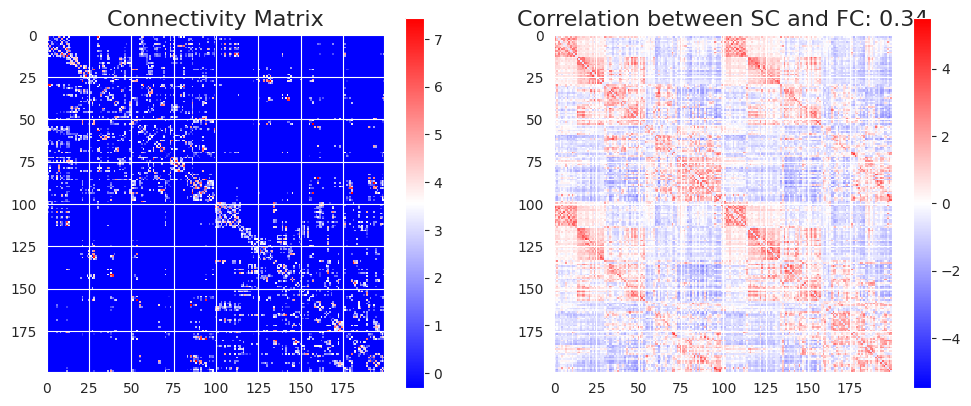

In [ ]:
# correlate the SC with the FC
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from nilearn import datasets, plotting
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

# Load connectivity matrix
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
# Center the connectivity matrix in 0
C = (C - np.mean(C)) / np.std(C)

SC_vals = C.copy()

# signed log1p: preserves sign if you ever had negative weights
SC_signed_log = np.sign(SC_vals) * np.log1p(np.abs(SC_vals))

# now Z-score
scaler = StandardScaler()
# flatten upper triangle (off‐diagonal) to fit the scaler, then reshape
triu_idx = np.triu_indices_from(SC_signed_log, k=1)
flat = SC_signed_log[triu_idx].reshape(-1,1)
flat_scaled = scaler.fit_transform(flat).ravel()

# rebuild the full matrix
SC_log_z = np.zeros_like(SC_signed_log)
SC_log_z[triu_idx] = flat_scaled
SC_log_z[(triu_idx[1], triu_idx[0])] = flat_scaled

fc_sc_corr = np.corrcoef(C.flatten(), emp_fc.flatten())[0, 1]
print(f"Correlation between SC and FC: {fc_sc_corr:.2f}")
# Plot the connectivity matrix
fig, ax = plt.subplots(nrows=1,ncols=2, figsize=(12, 6))
ax[0].imshow(SC_log_z, cmap='bwr', interpolation='nearest')
ax[0].set_title('Connectivity Matrix', fontsize=16)
plt.colorbar(ax[0].imshow(SC_log_z, cmap='bwr', interpolation='nearest'), ax=ax[0], shrink=0.8)
ax[1].imshow(emp_fc, interpolation='nearest', cmap=fc_color_palette, vmin=-lim, vmax=lim)
# Set as title the correlation value
ax[1].set_title(f'Correlation between SC and FC: {fc_sc_corr:.2f}', fontsize=16)
plt.colorbar(ax[1].imshow(emp_fc, interpolation='nearest', cmap=fc_color_palette, vmin=-lim, vmax=lim), ax=ax[1], shrink=0.8)


In [ ]:
fcs_grid.shape

(2, 100, 200, 200)

In [ ]:
all_sim_fc = np.mean(fcs_grid[1, :, :], axis=0)
# MSE
avg_mse_values = np.mean((all_sim_fc[triu_fc] - emp_fc[triu_fc]) ** 2)
print(f"Average MSE between simulated and empirical FC: {avg_mse_values:.4f}")

Average MSE between simulated and empirical FC: 0.0350


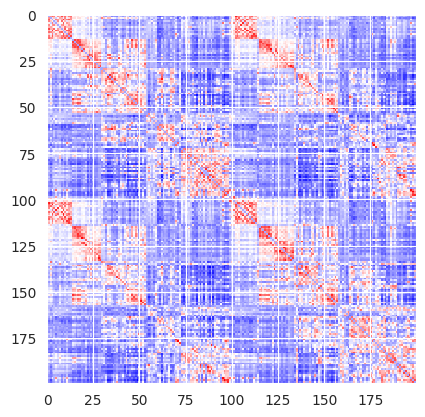

In [ ]:
plt.imshow(emp_fc, cmap='bwr', interpolation='nearest')

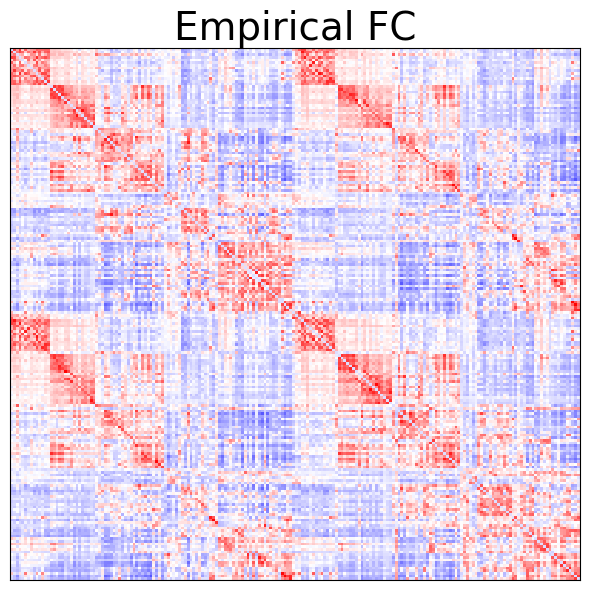

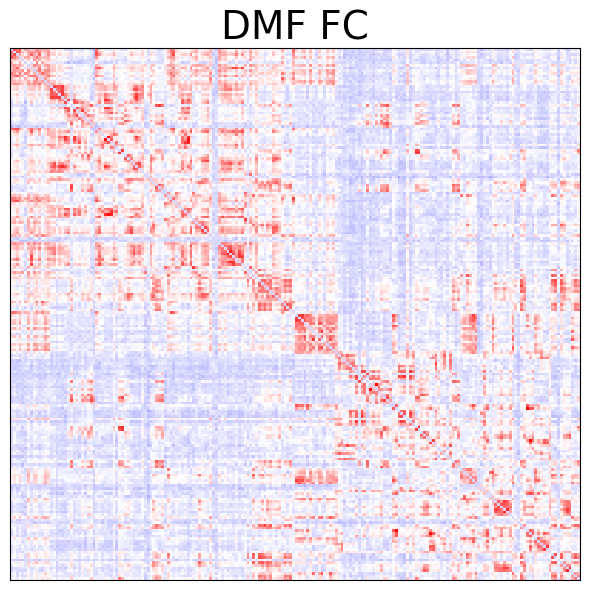

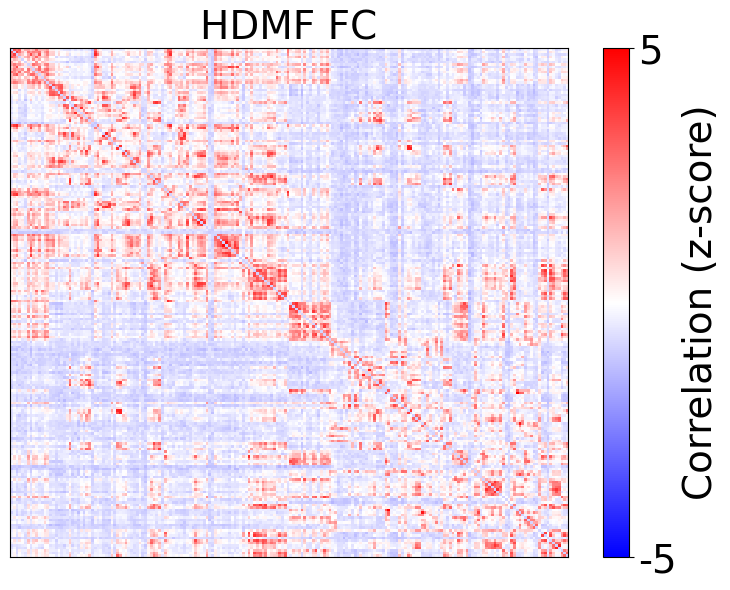

In [ ]:
	
# Font sizes
from tkinter import font


TITLE = 28
LABEL = 18
TICKS = 18
COLORBAR = 18

# Parameters
figname_base = 'FIG_3_'

fc_color_palette = 'bwr' #sns.diverging_palette(145, 300, s=60, as_cmap=True)
# Plot A: Empirical FC
fig_a = plt.figure(figsize=(6, 6))
# put 0 on the diagonal

# z-score the fc excluding the diagonal
emp_fc = (emp_fc - np.mean(emp_fc[triu_fc])) / np.std(emp_fc[triu_fc])
lim= np.max(np.abs(emp_fc))
plt.imshow(emp_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)


plt.title('Empirical FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_a.savefig(figfold + figname_base + 'A.png', dpi=300)
fig_a.savefig(figfold + figname_base + 'A.svg', dpi=300)
plt.show()

# Plot B: DMF FC
fig_b = plt.figure(figsize=(6, 6))
ave_static_fc = np.mean(fcs_grid[0, :16, :, :], axis=0)
# remove the diagonal
ave_static_fc = ave_static_fc - np.eye(ave_static_fc.shape[0])
# z-score the fc excluding the diagonal
ave_static_fc = (ave_static_fc - np.mean(ave_static_fc[triu_fc])) / np.std(ave_static_fc[triu_fc])
lim = np.max(np.abs(ave_static_fc))
plt.imshow(ave_static_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
plt.title('DMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_b.savefig(figfold + figname_base + 'B.png', dpi=300)
fig_b.savefig(figfold + figname_base + 'B.svg', dpi=300)
plt.show()

# Plot C: HDMF FC
fig_c = plt.figure(figsize=(7.55, 6))
ave_dynamic_fc = np.mean(fcs_grid[1, :16, :, :], axis=0)
ave_dynamic_fc = ave_dynamic_fc - np.eye(ave_dynamic_fc.shape[0]) 
# z-score the fc excluding the diagonal
ave_dynamic_fc = (ave_dynamic_fc - np.mean(ave_dynamic_fc[triu_fc])) / np.std(ave_dynamic_fc[triu_fc])
lim = np.max(np.abs(ave_dynamic_fc))
h = plt.imshow(ave_dynamic_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
cbar = plt.colorbar(h)
# Put -1 and 1 in the colorbar
cbar.set_ticks([-lim, lim])
cbar.set_ticklabels(['-5', '5'], fontsize=TITLE)
cbar.set_label('Correlation (z-score)', fontsize=TITLE)
plt.title('HDMF FC', fontsize=TITLE)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
#fig_c.savefig(figfold + figname_base + 'C.png', dpi=300)
#fig_c.savefig(figfold + figname_base + 'C.svg', dpi=300)
plt.show()

In [ ]:
import numpy as np
from scipy.stats import pearsonr

def match_unique_columns(emp_fc, sim_fc, threshold=0.01):
    """
    For each column i in emp_fc, find the sim_fc column with highest Pearson
    correlation. If two emp columns would pick the same sim column, then for
    the later one check if its second‐best match is within `threshold` of the
    best. If so (and that second‐best isn’t already taken), pick that instead.

    Parameters
    ----------
    emp_fc : ndarray, shape (N, M)
        Empirical FC with M columns.
    sim_fc : ndarray, shape (N, K)
        Simulated FC with K columns.
    threshold : float
        Maximum allowed drop in correlation (best − candidate) to accept the
        candidate as “close enough”.

    Returns
    -------
    assignments : ndarray, shape (M,)
        assignments[i] = index j in sim_fc chosen for emp_fc column i.
    corrs : ndarray, shape (M,)
        Pearson correlation for the chosen pairs.
    """
    M = emp_fc.shape[1]
    K = sim_fc.shape[1]

    # Precompute all correlations: corr_matrix[i, j] = corr(emp[:,i], sim[:,j])
    corr_matrix = np.zeros((M, K))
    for i in range(M):
        for j in range(K):
            corr_matrix[i, j] = pearsonr(emp_fc[:, i], sim_fc[:, j])[0]

    assignments = np.full(M, -1, dtype=int)
    corrs = np.zeros(M)
    taken = set()

    for i in range(M):
        print(f"Processing emp column {i+1}/{M}...")
        corrs_i = corr_matrix[i]
        # descending sort of sim indices by correlation
        candidates = np.argsort(corrs_i)[::-1]
        best_j = candidates[0]
        best_corr = corrs_i[best_j]

        if best_j not in taken:
            # best is free
            chosen_j = best_j
        else:
            # try next best within threshold
            chosen_j = best_j  # default
            print(f"Best taken with corr {corrs_i[best_j]:.2f}, next candidates corrs are: {corrs_i[candidates[1:5]]}")
            for j in candidates[1:]:
                corr_j = corrs_i[j]
                if (best_corr - corr_j) <= threshold and j not in taken:
                    chosen_j = j
                    break
            # if none within threshold & free, we keep best_j (even if duplicate)

        assignments[i] = chosen_j
        corrs[i] = corrs_i[chosen_j]
        taken.add(chosen_j)

    return assignments, corrs



Processing emp column 1/200...
Processing emp column 2/200...
Processing emp column 3/200...
Best taken with corr 0.27, next candidates corrs are: [0.24528082 0.22639457 0.22015733 0.21215111]
Processing emp column 4/200...
Best taken with corr 0.50, next candidates corrs are: [0.4791773  0.47402472 0.46976818 0.46704837]
Processing emp column 5/200...
Best taken with corr 0.53, next candidates corrs are: [0.51834396 0.50617084 0.47804687 0.45939083]
Processing emp column 6/200...
Processing emp column 7/200...
Best taken with corr 0.56, next candidates corrs are: [0.53873502 0.51153103 0.50424941 0.50146747]
Processing emp column 8/200...
Best taken with corr 0.42, next candidates corrs are: [0.39534528 0.38189362 0.3790718  0.36964431]
Processing emp column 9/200...
Best taken with corr 0.47, next candidates corrs are: [0.45883052 0.45210229 0.43853855 0.43116906]
Processing emp column 10/200...
Best taken with corr 0.56, next candidates corrs are: [0.55256252 0.54485995 0.53808311 0

In [ ]:
from enigmatoolbox.datasets import load_sc, load_fc
aal90 = loadmat("../matlab/AAL_FC_and_SC.mat")
sc_ctx, sc_ctx_labels, _, _ = load_sc('schaefer_200')


In [ ]:
fc_ctx, fc_csx_labels,_,_ = load_fc('schaefer_200')

Processing emp column 1/200...
Processing emp column 2/200...
Processing emp column 3/200...
Processing emp column 4/200...
Processing emp column 5/200...
Processing emp column 6/200...
Processing emp column 7/200...
Processing emp column 8/200...
Processing emp column 9/200...
Best taken with corr 0.76, next candidates corrs are: [0.65372148 0.6493465  0.64737187 0.64608512]
Processing emp column 10/200...
Processing emp column 11/200...
Processing emp column 12/200...
Processing emp column 13/200...
Processing emp column 14/200...
Processing emp column 15/200...
Processing emp column 16/200...
Processing emp column 17/200...
Processing emp column 18/200...
Processing emp column 19/200...
Processing emp column 20/200...
Processing emp column 21/200...
Processing emp column 22/200...
Processing emp column 23/200...
Processing emp column 24/200...
Processing emp column 25/200...
Processing emp column 26/200...
Processing emp column 27/200...
Processing emp column 28/200...
Processing em

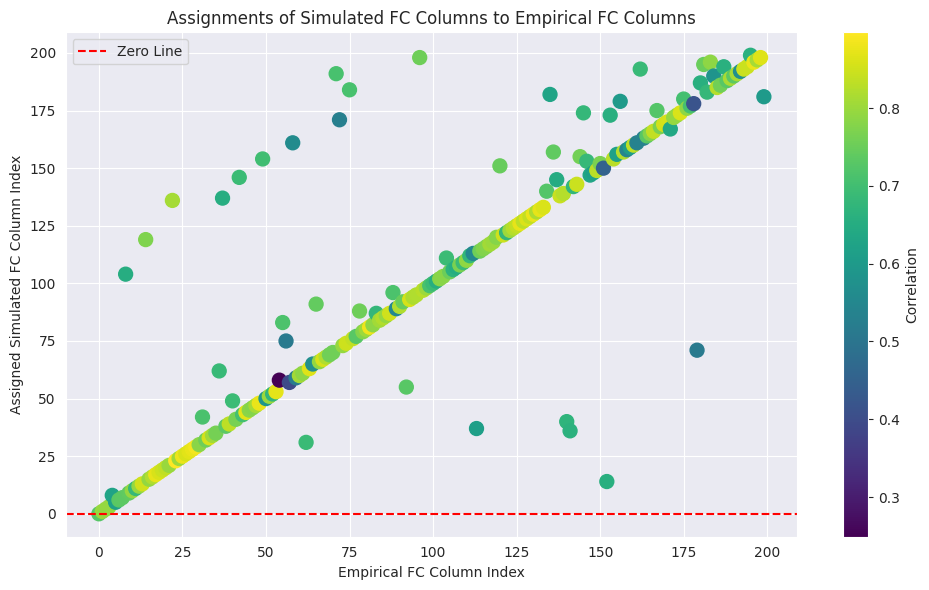

Processing emp column 1/200...
Processing emp column 2/200...
Best taken with corr 0.53, next candidates corrs are: [0.50809099 0.47790796 0.45077421 0.43976042]
Processing emp column 3/200...
Processing emp column 4/200...
Best taken with corr 0.62, next candidates corrs are: [0.55426403 0.51343125 0.50785237 0.50055585]
Processing emp column 5/200...
Processing emp column 6/200...
Best taken with corr 0.60, next candidates corrs are: [0.569373   0.56164474 0.51695253 0.51364246]
Processing emp column 7/200...
Best taken with corr 0.64, next candidates corrs are: [0.62121695 0.51364647 0.4983304  0.48469969]
Processing emp column 8/200...
Best taken with corr 0.43, next candidates corrs are: [0.41148519 0.38263325 0.37610888 0.37159429]
Processing emp column 9/200...
Best taken with corr 0.52, next candidates corrs are: [0.52358734 0.49789398 0.47603873 0.4282141 ]
Processing emp column 10/200...
Best taken with corr 0.76, next candidates corrs are: [0.5354041  0.52795312 0.52098679 0

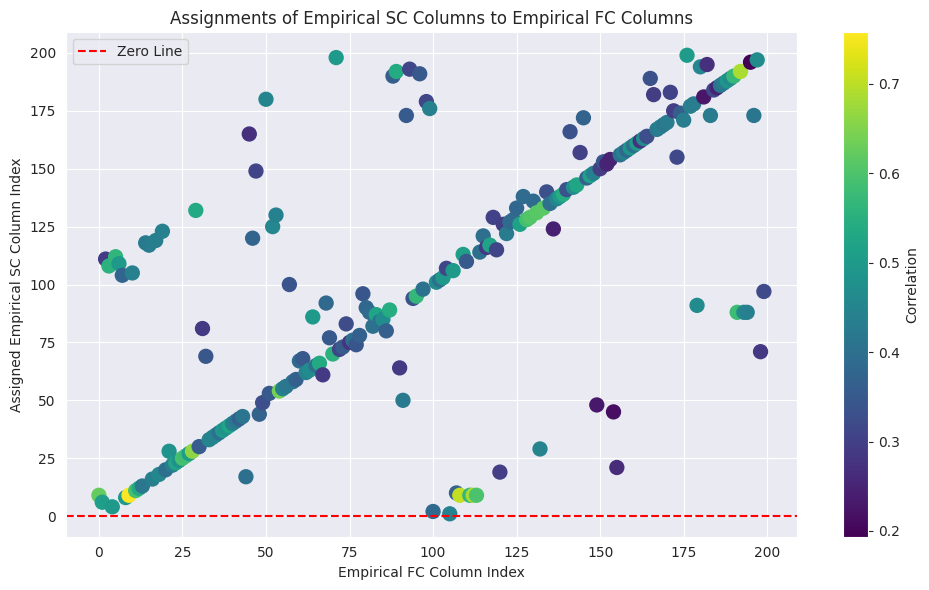

In [ ]:
# Example usage:
C = loadmat('./data/DTI_fiber_consensus_HCP.mat')['connectivity'][:200, :200]
C = C/ np.max(C)  # Normalize the connectivity matrix
assignments, correlations = match_unique_columns(emp_fc, fc_ctx, threshold=0.2)
print("Chosen sim indices for each emp column:", assignments)
print("Their correlations:", correlations)

# Check if there are no duplicates in the assignments
if len(set(assignments)) != len(assignments):
    print("Warning: There are duplicate assignments!")
    print("Assignments:", len((assignments)))
    print("Unique assignments:", len(set(assignments)))
# Plot the assignments
plt.figure(figsize=(10, 6))
plt.scatter(range(len(assignments)), assignments, c=correlations, cmap='viridis', s=100)
plt.colorbar(label='Correlation')
plt.xlabel('Empirical FC Column Index')
plt.ylabel('Assigned Simulated FC Column Index')
plt.title('Assignments of Simulated FC Columns to Empirical FC Columns')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.legend()
plt.tight_layout()
plt.show()



assignments, correlations = match_unique_columns(emp_fc, sc_ctx, threshold=0.2)
print("Chosen sim indices for each emp column:", assignments)
print("Their correlations:", correlations)

# Check if there are no duplicates in the assignments
if len(set(assignments)) != len(assignments):
    print("Warning: There are duplicate assignments!")
    print("Assignments:", len((assignments)))
    print("Unique assignments:", len(set(assignments)))
# Plot the assignments
plt.figure(figsize=(10, 6))
plt.scatter(range(len(assignments)), assignments, c=correlations, cmap='viridis', s=100)
plt.colorbar(label='Correlation')
plt.xlabel('Empirical FC Column Index')
plt.ylabel('Assigned Empirical SC Column Index')
plt.title('Assignments of Empirical SC Columns to Empirical FC Columns')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')
plt.legend()
plt.tight_layout()
plt.show()





In [ ]:
labels

array([b'7Networks_LH_Vis_1', b'7Networks_LH_Vis_2',
       b'7Networks_LH_Vis_3', b'7Networks_LH_Vis_4',
       b'7Networks_LH_Vis_5', b'7Networks_LH_Vis_6',
       b'7Networks_LH_Vis_7', b'7Networks_LH_Vis_8',
       b'7Networks_LH_Vis_9', b'7Networks_LH_Vis_10',
       b'7Networks_LH_Vis_11', b'7Networks_LH_Vis_12',
       b'7Networks_LH_Vis_13', b'7Networks_LH_Vis_14',
       b'7Networks_LH_SomMot_1', b'7Networks_LH_SomMot_2',
       b'7Networks_LH_SomMot_3', b'7Networks_LH_SomMot_4',
       b'7Networks_LH_SomMot_5', b'7Networks_LH_SomMot_6',
       b'7Networks_LH_SomMot_7', b'7Networks_LH_SomMot_8',
       b'7Networks_LH_SomMot_9', b'7Networks_LH_SomMot_10',
       b'7Networks_LH_SomMot_11', b'7Networks_LH_SomMot_12',
       b'7Networks_LH_SomMot_13', b'7Networks_LH_SomMot_14',
       b'7Networks_LH_SomMot_15', b'7Networks_LH_SomMot_16',
       b'7Networks_LH_DorsAttn_Post_1', b'7Networks_LH_DorsAttn_Post_2',
       b'7Networks_LH_DorsAttn_Post_3', b'7Networks_LH_DorsAttn_Post_4',

In [ ]:
labels[assignments]

array([b'7Networks_RH_Vis_14', b'7Networks_RH_Vis_11',
       b'7Networks_LH_SomMot_3', b'7Networks_LH_Vis_4',
       b'7Networks_RH_Vis_12', b'7Networks_RH_Cont_pCun_1',
       b'7Networks_RH_Vis_4', b'7Networks_LH_Vis_6',
       b'7Networks_LH_Vis_9', b'7Networks_RH_Vis_7',
       b'7Networks_RH_Vis_6', b'7Networks_LH_Vis_12',
       b'7Networks_LH_Vis_13', b'7Networks_RH_Vis_9',
       b'7Networks_RH_SomMot_3', b'7Networks_RH_SomMot_6',
       b'7Networks_RH_SomMot_4', b'7Networks_RH_SomMot_5',
       b'7Networks_LH_SomMot_5', b'7Networks_RH_DorsAttn_Post_5',
       b'7Networks_RH_SomMot_12', b'7Networks_LH_SomMot_16',
       b'7Networks_LH_SomMot_9', b'7Networks_RH_SomMot_14',
       b'7Networks_LH_SomMot_11', b'7Networks_LH_SomMot_12',
       b'7Networks_RH_SomMot_18', b'7Networks_LH_SomMot_14',
       b'7Networks_LH_SomMot_15', b'7Networks_RH_SomMot_19',
       b'7Networks_LH_DorsAttn_Post_1', b'7Networks_LH_SomMot_7',
       b'7Networks_LH_DorsAttn_Post_3', b'7Networks_LH_DorsAt

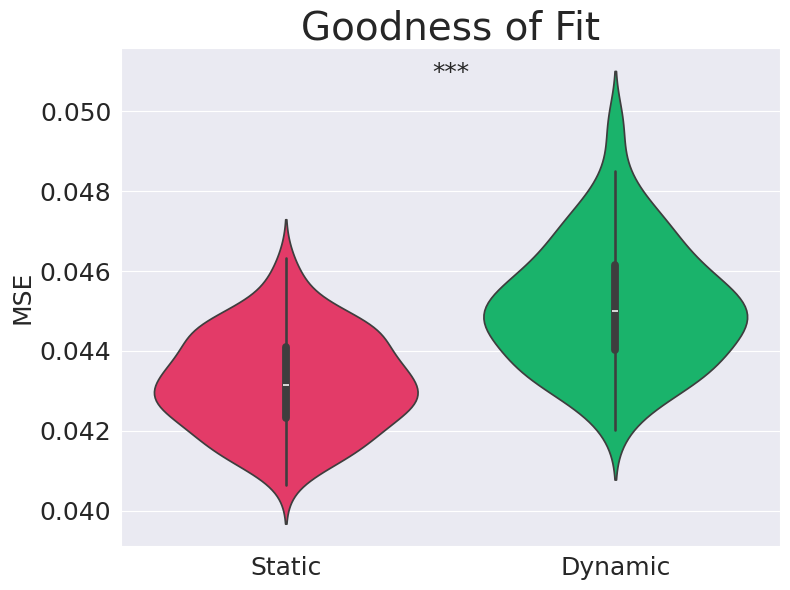

In [ ]:
# Plot D: Violin Plot for Goodness of Fit
# Compute goodness of fit as MSE
sns.set_style("darkgrid")

gof = mean_mse_values.T  # shape: (repetitions, 2)
#gof = 1 - rep_corr.T  # shape: (repetitions, 2)


fig_d = plt.figure(figsize=(8, 6))
sns.violinplot(data=gof, palette=[category_colors['Static'], category_colors['Dynamic']])
plt.xticks(ticks=[0, 1], labels=['Static', 'Dynamic'], fontsize=TICKS)
plt.yticks(fontsize=TICKS)
plt.ylabel('MSE', fontsize=LABEL)
plt.title('Goodness of Fit', fontsize=TITLE)

# Perform KS two-sample test on the goodness of fit distributions
stat, p_value = ks_2samp(gof[:, 0], gof[:, 1])
if p_value < 0.05:
    if p_value < 0.001:
        annotation = '***'
    elif p_value < 0.01:
        annotation = '**'
    else:
        annotation = '*'
else:
    annotation = f"p = {p_value:.3f}"
    
plt.text(0.5, 0.95, annotation,
         horizontalalignment='center', verticalalignment='center',
         transform=plt.gca().transAxes, fontsize=LABEL)

plt.tight_layout()
#fig_d.savefig(figfold + figname_base + 'D.png', dpi=300)
#fig_d.savefig(figfold + figname_base + 'D.svg', dpi=300)
plt.show()
